In [151]:
# Obligatory assignment 3
# Students: skn003, tre081

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() #for plot styling
import numpy as np
import pandas as pd
import mglearn
import math

from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as gasmix
from sklearn.model_selection import StratifiedKFold
from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse

In [152]:
data = pd.read_excel('Engelsberger_short.xlsx', skiprows = 0, header = 1)
data = data.drop(columns=['Accession (AGI code)', 'Sequence with modifications', 'treatment'])

In [153]:
#Replaces NaN values in rows with something
data.fillna(data.mean(), inplace=True)
#Checks for NaN in data
data.isna().sum()
data.shape

(640, 5)

In [166]:
def kmeans(ax = None):
    X=data.iloc[:, ::-1].values

    km = KMeans(n_clusters = 5)
    km.fit(X)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], km.labels_, markers='o')
    mglearn.discrete_scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], [0, 1, 2, 3, 4], markers='^', markeredgewidth=2)
    
    labels = km.fit_predict(X)
    
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    
    # plot the representation of the KMeans model
    centers = km.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.4, zorder=1))

In [172]:
def gaussian_mixture():
    X = data.iloc[:, 0:5].values
    gmm = gasmix(n_components = 5)
    gmm.fit(X)
    
    labels = gmm.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c = labels, s = 20, cmap='viridis');
    
    probs = gmm.predict_proba(X)
    print(probs[:5].round(3))
    
    size = 50 * probs.max(1) ** 2 #square emphasizes diffrences
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);
    
    pca = PCA(0.99, whiten=True)
    transf_data = pca.fit_transform(data)
    transf_data.shape

    
    def draw_ellipse(position, covariance, ax=None, **kwargs):
        """Draw an ellipse with a given position and covariance"""
        ax = ax or plt.gca()

        # Convert covariance to principal axes
        if covariance.shape == (2, 2):
            U, s, Vt = np.linalg.svd(covariance)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
        else:
            angle = 0
            width = 2 * np.sqrt(covariance[0])
            height = 2 * np.sqrt(covariance[1])

        # Draw the Ellipse
        for nsig in range(1, 4):
            for n in range(len(width)):
                nw = nsig * width[n]
                nh = nsig * height[n]
                if math.isnan(nw):
                    nw = 0
                if math.isnan(nh):
                    nh = 0
                ax.add_patch(Ellipse(position, nw, nh, angle, **kwargs))

                
    def plot_gmm(gmm, X, label=True, ax=None):
        ax = ax or plt.gca()
        labels = gmm.fit_predict(X)
        if label:
            ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
        else:
            ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
        ax.axis('equal')

        w_factor = 0.2 / gmm.weights_.max()
        for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
            draw_ellipse(pos, covar, alpha=w * w_factor)
            
    
    gmm = gasmix(n_components=5, random_state=42)
    plot_gmm(gmm, X)
    
    gmm = gasmix(n_components=4, covariance_type='full', random_state=42)
    plot_gmm(gmm, X_stretched)
    
    n_components = np.arange(50, 210, 10)
    models = [gasmix(n, covariance_type='full', random_state=0) for n in n_components]
    aics = [model.fit(transf_data).aic(transf_data) for model in models]
    plt.plot(n_components, aics);

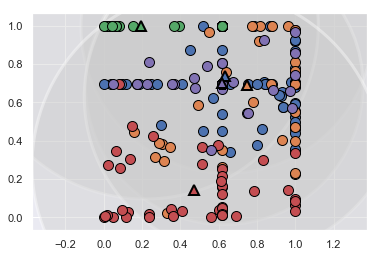

In [173]:
kmeans()

[[0.    0.    1.    0.    0.   ]
 [0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.352 0.648]
 [0.    0.    0.    0.998 0.002]
 [0.    0.    0.    0.892 0.108]]


C:\Users\soknu\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt
C:\Users\soknu\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt


NameError: name 'X_stretched' is not defined

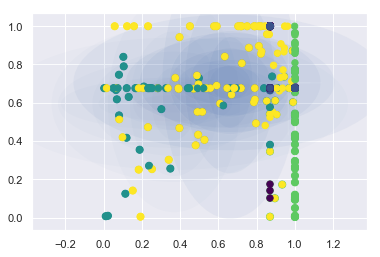

In [174]:
gaussian_mixture()